# Use pagerank algorithm to determine most referenced key words/topics from Tweets

In [1]:
#uses page rank algoritm to find common words used across topics
import re
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import collections
from nltk.collocations import *
import nltk.draw
import string
import re
import nltk
import glob
from nltk.corpus import stopwords
from datetime import datetime
from nltk.tokenize import TweetTokenizer
from wordcloud import WordCloud
#for ipython
%matplotlib notebook

In [2]:
allFiles = glob.glob("Fintech/*/Fintech*.csv")
#allFiles = glob.glob("Uk_J*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df0 = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df0)
df = pd.concat(list_)

In [3]:
df0 = df[df.Tweet_Text.str.contains("http") == False]
df1 = df0[df0.Tweet_Text.str.contains(".com") == False]

tweets = list(df1.Tweet_Text.drop_duplicates())
tknzr = TweetTokenizer()
tokens = tknzr.tokenize(str(tweets).translate(None, string.punctuation))

In [4]:
stop = stopwords.words('english')
stop += ['rt','im', 'thats', '.' , \
        ',', '?', '!']
stop += ['barclays', 'hsbc', 'lloyds', 'halifax', 'natwest', 'metro', 'wells', 'bank', 'account']
stop += ['wells', 'fargo', 'wellsfargo', 'pnc', 'suntrust', 'pnc', 'çapital one']
stop += ['scotiabank', 'royal', 'national', 'cibc', 'bmo', 'tangerine']
stop += ['apple pay', 'btc', 'apple', 'bitcoin', 'kabbage', 'fundrise', 'crowdstreet', 'zopa', 'ratesetter', \
        'sofi', 'commonbond', 'lendzoan', 'property', 'bitcoin', 'getmoven', 'mint', 'paypal', 'transferwise', \
        'ally', 'synchrony', 'discover', 'simple', 'bank5connect', 'sainsburys', 'sainsbury', 'ms', 'tesco', 'applepay', \
        'allybank', 'blockchain']
stop += ['bank', 'banking', 'account']
tweet_texts_processed = [i.lower().encode('ascii', 'ignore') for i in tokens if i.lower() not in stop]

/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [5]:
tags = nltk.pos_tag(tweet_texts_processed)
nouns = [word for word,pos in tags if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS')]

### Create the Graph

In [6]:
textNLTK=nltk.text.ContextIndex(nouns)
#topics = ['account',  'apple', 'service', 'mobile', 'money', 'app', 'safe', 'machine', 'tech', 'smart', 'online',\
#          'trust', 'technology', 'payment', 'card', 'secure']
topics = ['funding',  'kabbage', 'lendinvest', 'lendio', 'ondeck', 'prosper', 'ratesetter', 'zopa', \
          'paydayloan', 'marketinvoice', 'crowdstreet',\
          'fundrise', 'lendinghome', 'lendzoan', 'prodigynetwork', 'propertycrowd', 'realpartner', 'realcrowd', \
         'bitcoin', 'cryptocurrency', 'currencycloud', 'blockchain', 'getmoven', 'paypal', 'transferwise', \
         'applepay', 'samsungpay', 'allybank', 'synchrony', 'bank5connect', 'rbc', 'rabo']

nodeEdges={x:textNLTK.similar_words(x) for x in topics} #dictionary of nodes and edges

nodeEdges = {k:v for k,v in nodeEdges.items() if v}

topicfinal = nodeEdges.keys()
edges= [(x,y) for x in topicfinal for y in nodeEdges[x]]

In [7]:
G=nx.Graph()
G.add_nodes_from(topics)
G.add_edges_from(edges)

### Pageranking

In [8]:
pageRank=nx.pagerank(G)
d = collections.Counter(pageRank)
d.most_common(100)#most common

[('cryptocurrency', 0.05355782946979143),
 ('prosper', 0.05072706117318154),
 ('rabo', 0.05062115784825788),
 ('samsungpay', 0.049541483470270306),
 ('funding', 0.048926854058382124),
 ('marketinvoice', 0.04810083508123897),
 ('paydayloan', 0.04760564259121318),
 ('rbc', 0.04431822542701834),
 ('lendio', 0.024389846152521138),
 ('prodigynetwork', 0.021737533623173835),
 ('ondeck', 0.011243990816714563),
 ('pay', 0.01088671971058934),
 ('payment', 0.009204206061806636),
 ('banks', 0.008763547534992464),
 ('thanks', 0.008619687113211403),
 ('money', 0.007013088970665899),
 ('cards', 0.006815978966916575),
 ('shows', 0.005785363031530229),
 ('websocket', 0.005785363031530229),
 ('lendinvest', 0.005785363031530229),
 ('currencycloud', 0.005785363031530229),
 ('platform', 0.0051019104998213365),
 ('club', 0.00504583209618726),
 ('support', 0.004932751772106507),
 ('card', 0.004932751772106506),
 ('dont', 0.004773752868409101),
 ('credit', 0.004664928394568325),
 ('use', 0.004664928394568325

<IPython.core.display.Javascript object>


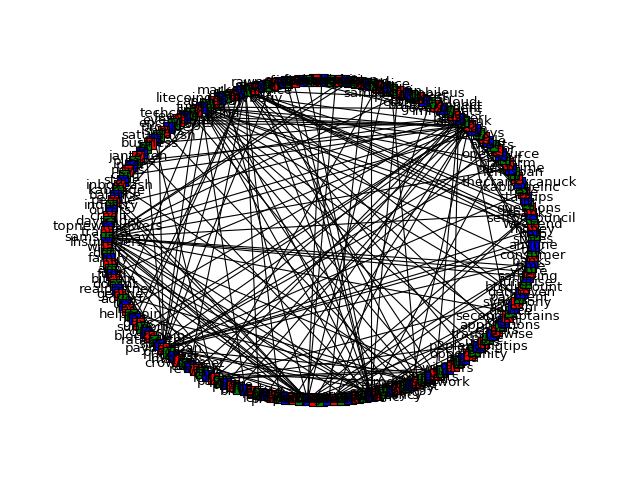

In [13]:
nx.draw_shell(G,node_size=100,node_color='rgb',node_shape='s',with_labels=True)

In [9]:
themes = [x for x in d.most_common(100) if x[0] not in topicfinal]

In [10]:
themes[1:10]

[('payment', 0.009204206061806636),
 ('banks', 0.008763547534992464),
 ('thanks', 0.008619687113211403),
 ('money', 0.007013088970665899),
 ('cards', 0.006815978966916575),
 ('shows', 0.005785363031530229),
 ('websocket', 0.005785363031530229),
 ('platform', 0.0051019104998213365),
 ('club', 0.00504583209618726)]

<IPython.core.display.Javascript object>


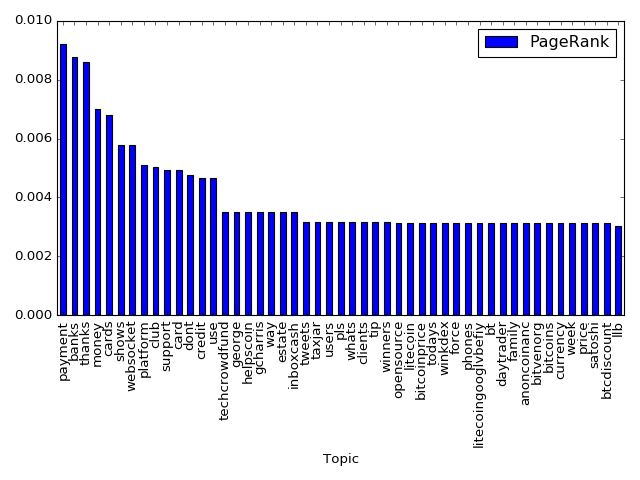

In [14]:
df = pd.DataFrame(themes[1:50], columns=['Topic', 'PageRank'])
df.plot(x='Topic',y='PageRank',kind='bar')
plt.tight_layout()
plt.show()

## Rough Work

In [15]:
freq_nouns=nltk.FreqDist(nouns)

In [ ]:
#freqnouns = [x[0] for x in freq_nouns.most_common(1000)]

In [ ]:
#str1 = ' '.join(freqnouns)

In [ ]:
#WordCloud.generate_from_frequencies()
#wordcloud = WordCloud(
#                      max_words=1515,
#                      background_color='black',
#                      width=3500,
#                      height=2000,
#                      margin=10,random_state=1
#                     ).generate(str1)
#plt.imshow(wordcloud)
#plt.axis('off')
#plt.tight_layout()
#plt.show()


/home/ubuntu/anaconda2/lib/python2.7/site-packages/PIL/ImageDraw.py:104: UserWarning: setfont() is deprecated. Please set the attribute directly instead.
  "Please set the attribute directly instead.")


<IPython.core.display.Javascript object>


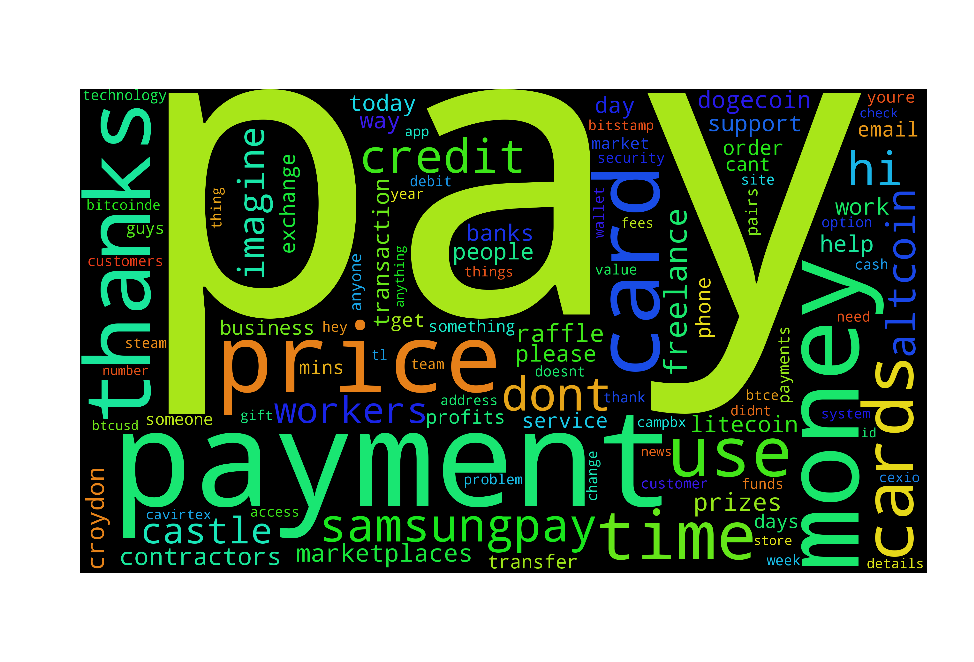

In [16]:
wordcloud = WordCloud(
                      background_color='black',
                      width=3500,
                      height=2000,
                      margin=10,random_state=1
                     ).generate_from_frequencies(freq_nouns.most_common(100))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout()
plt.show()
